## KNN and SVM : works very well with smaller datasets <2000.

## Read the dataset

In [1]:
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/drug200.csv"
import pandas as pd

df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y
Y: Drug

In [5]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [6]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


## Data Preprocessing and Data cleaning

In [8]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
con_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [11]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

In [14]:
pre = ColumnTransformer([("cat", cat_pipe, cat), ("con", con_pipe, con)]).set_output(
    transform="pandas"
)

In [15]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K'])])

In [16]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794


## Split the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, train_size=0.8, random_state=21
)

In [18]:
xtrain.shape

(160, 9)

In [19]:
xtest.shape

(40, 9)

## 1) KNN => K Nearest Neighbors
Euclidean distance
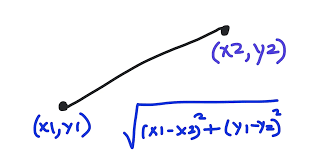

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(xtrain, ytrain)

c:\ML 9-11am\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [22]:
model.score(xtrain, ytrain)

0.90625

In [23]:
model.score(xtest, ytest)

0.725

## Hyperparameter tuning

In [28]:
params = {"n_neighbors": [15, 16, 17, 18, 19, 20, 25]}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

base_model = KNeighborsClassifier()
model_knn = RandomizedSearchCV(
    estimator=base_model, param_distributions=params, cv=3, scoring="f1_macro"
)
model_knn.fit(xtrain, ytrain)

c:\ML 9-11am\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ML 9-11am\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ML 9-11am\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ML 9-11am\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [15, 16, 17, 18, 19, 20,
                                                        25]},
                   scoring='f1_macro')

In [30]:
model_knn.best_score_

np.float64(0.7980028454069373)

In [31]:
model_knn.best_params_

{'n_neighbors': 15}

In [32]:
best_knn = model_knn.best_estimator_
best_knn.fit(xtrain, ytrain)

c:\ML 9-11am\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [33]:
best_knn.score(xtrain, ytrain)

0.925

In [34]:
best_knn.score(xtest, ytest)

0.75

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

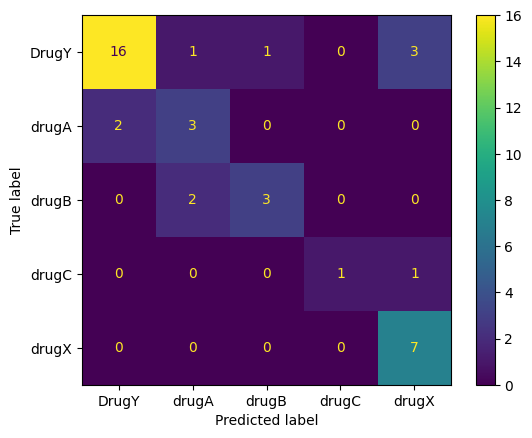

In [36]:
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

In [37]:
from sklearn.metrics import classification_report

ypred = best_knn.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       DrugY       0.89      0.76      0.82        21
       drugA       0.50      0.60      0.55         5
       drugB       0.75      0.60      0.67         5
       drugC       1.00      0.50      0.67         2
       drugX       0.64      1.00      0.78         7

    accuracy                           0.75        40
   macro avg       0.76      0.69      0.70        40
weighted avg       0.78      0.75      0.75        40



## 2) SVM: Support vector classifier

In [38]:
from sklearn.svm import SVC

model2 = SVC(probability=True)
model2.fit(xtrain, ytrain)

c:\ML 9-11am\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [39]:
model2.score(xtrain, ytrain)

0.99375

In [40]:
model2.score(xtest, ytest)

0.9

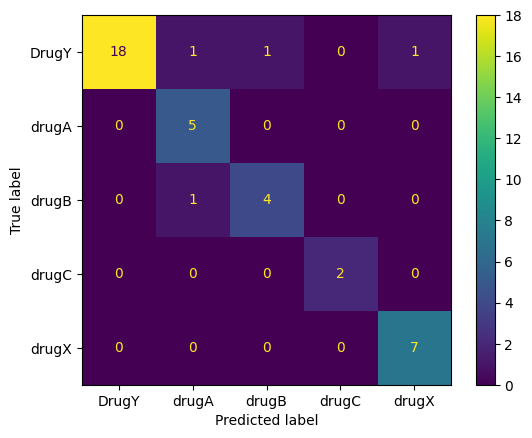

In [46]:
ConfusionMatrixDisplay.from_estimator(model2, xtest, ytest)

In [47]:
ypred2 = model2.predict(xtest)
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

       DrugY       1.00      0.86      0.92        21
       drugA       0.71      1.00      0.83         5
       drugB       0.80      0.80      0.80         5
       drugC       1.00      1.00      1.00         2
       drugX       0.88      1.00      0.93         7

    accuracy                           0.90        40
   macro avg       0.88      0.93      0.90        40
weighted avg       0.92      0.90      0.90        40



## SVC is giving best scores >0.80. can be considered for out of sample predictions

## Out of sample predictions

In [41]:
path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/DrugTest.csv"
xnew = pd.read_csv(path2)
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [42]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K'])])

In [43]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,-0.298088


In [44]:
DrugPredicted = model2.predict(xnew_pre)
DrugPredicted

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'drugC',
       'drugC', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugA', 'drugB', 'drugC', 'DrugY', 'drugA',
       'drugB', 'drugA', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugX', 'DrugY', 'drugA', 'drugX', 'drugB', 'DrugY',
       'DrugY'], dtype=object)

In [45]:
xnew["Drug_Predicted"] = DrugPredicted
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Predicted
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,drugX


In [48]:
xnew.to_csv("Drug Predictions.csv", index=False)